In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import os
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")


In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0,std=1)])

In [ ]:
train_dataset  = FashionMNIST(os.getcwd(), train=True, transform = transform, download = True)
test_dataset =  FashionMNIST(os.getcwd(), train = False, transform = transform , download = True)

In [8]:
print(train_dataset,test_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0, std=1)
           ) Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0, std=1)
           )


In [10]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers= 4)
test_loader = DataLoader(test_dataset,batch_size=16,shuffle=True,num_workers= 4)

In [13]:
print(train_loader,test_loader)

<torch.utils.data.dataloader.DataLoader object at 0x7fe87811db38> <torch.utils.data.dataloader.DataLoader object at 0x7fe87811db00>


In [14]:
train_loader

In [15]:
train_iter = iter(train_loader)

In [16]:
train_batch = next(train_iter)
print(train_batch)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [18]:
print(len(train_batch))

2


In [20]:
for item in train_batch:
  print(item.size())

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [22]:
def plot_images(batch):
  img_grid = make_grid(batch[0],nrow=8)
  img_np = img_grid.numpy()
  img_np = np.transpose(img_np,(1,2,0))
  plt.figure(figsize=(8,8))
  plt.imshow(img_np)
  plt.title(batch[1])
  plt.plot()


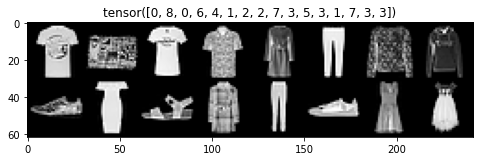

In [23]:
plot_images(train_batch)

In [24]:
flatten = nn.Flatten()
flatten(train_batch[0]).size()

torch.Size([16, 784])

In [25]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features = 784,out_features=650),
    nn.ReLU(),
    nn.Linear(in_features=650,out_features=420),
    nn.ReLU(),
    nn.Linear(in_features=420,out_features=360),
    nn.ReLU(),
    nn.Linear(in_features=360,out_features=230),
    nn.ReLU(),
    nn.Linear(in_features=230,out_features=10),
    nn.Softmax(dim=1)

)

model

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=650, bias=True)
  (2): ReLU()
  (3): Linear(in_features=650, out_features=420, bias=True)
  (4): ReLU()
  (5): Linear(in_features=420, out_features=360, bias=True)
  (6): ReLU()
  (7): Linear(in_features=360, out_features=230, bias=True)
  (8): ReLU()
  (9): Linear(in_features=230, out_features=10, bias=True)
  (10): Softmax(dim=1)
)

In [29]:
print(len(train_batch))

2


In [30]:
train_batch[0].size()

torch.Size([16, 1, 28, 28])

In [33]:
pred_batch = model(train_batch[0])
print(pred_batch.size())

torch.Size([16, 10])


In [34]:
pred_labels = torch.argmax(pred_batch,axis=1)
print(pred_labels)

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])


In [38]:
losscc  = nn.CrossEntropyLoss()
losscc(pred_batch , train_batch[1])

tensor(2.3021, grad_fn=<NllLossBackward>)

In [43]:
def evaluate_on_cpu(model,dataloader):
  with torch.no_grad():
    total,correct = 0,0

    for batch in dataloader():
      images,labels = batch
      out_probs = model(iamges)
      out_labels = torch.argmax(out_probs,axis=1)
      total += labels.size(0)
      correct += torch.sum(labels = out_labels).item()
  return 100 * correct/total

def train_on_cpu(model,loss,optimizer,train_loader,test_loader,epochs=200):
  hist = {"loss":[],
          "train_acc":[],
          "test_acc":[]
          }
  for epoch_num in tqdm(range(1,epochs+1),desc="training",total=epochs):
    losses = []
    for batch in train_loader:
      images, labels = batch

      optimizer.zero_gard()
      out  = model(images)

      loss = losscc(out,lables)
      loss.append(loss.item())
      loss.backward()

      optimizer.step()

    hist["loss"].append(np.array(losses).mean())
    train_acc = evaluate(model,train_loader)
    test_acc = evalaue(model,test_laoder)
    hist["train_acc"].append(train_acc)
    hist["test_acc"].append(test_acc)

  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
  ax[0].plot(range(1,epochs+1),hist["loss"],label = "loss")
  ax[0].grid()
  ax[0].set_xlabel('epochs')
  ax[0].set_yalbel('loss')
  ax[0].set_title("Epochs vs loss")

  ax[1].plot(range(1,epochs+1),hist["train_acc"],label = "Train_accuracy")
  ax[1].plot(range(1,epochs+1),hist["test_acc"],label = "Test_accuracy")
  ax[1].grid()
  ax[1].set_xlabel('epochs')
  ax[1].set_yalbel('loss')
  plt,show()

  return model





In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
def evaluate_on_gpu(model,dataloader):
  with torch.no_grad():
    total,correct = 0,0

    for batch in dataloader():
      images,labels = batch
      images, labels = images.to(device),labels.to(device)

      out_probs = model(images)
      out_labels = torch.argmax(out_probs,axis=1)
      total += labels.size(0)
      correct += torch.sum(labels = out_labels).item()
  return 100 * correct/total

def train_on_cpu(model,loss,optimizer,train_loader,test_loader,epochs=200):
  hist = {"loss":[],
          "train_acc":[],
          "test_acc":[]
          }
  for epoch_num in tqdm(range(1,epochs+1),desc="training",total=epochs):
    losses = []
    for batch in train_loader:
      images,labels = batch
      images, labels = images.to(device),labels.to(device)

      optimizer.zero_gard()
      out  = model(images)

      loss = losscc(out,lables)
      loss.append(loss.item())
      loss.backward()

      optimizer.step()

    hist["loss"].append(np.array(losses).mean())
    train_acc = evaluate_on_gpu(model,train_loader)
    test_acc = evalaue_on_gpu(model,test_loader)
    hist["train_acc"].append(train_acc)
    hist["test_acc"].append(test_acc)

  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
  ax[0].plot(range(1,epochs+1),hist["loss"],label = "loss")
  ax[0].grid()
  ax[0].set_xlabel('epochs')
  ax[0].set_yalbel('loss')
  ax[0].set_title("Epochs vs loss")

  ax[1].plot(range(1,epochs+1),hist["train_acc"],label = "Train_accuracy")
  ax[1].plot(range(1,epochs+1),hist["test_acc"],label = "Test_accuracy")
  ax[1].grid()
  ax[1].set_xlabel('epochs')
  ax[1].set_yalbel('loss')
  plt,show()

  return model





In [44]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features = 784,out_features=650),
    nn.ReLU(),
    nn.Linear(in_features=650,out_features=420),
    nn.ReLU(),
    nn.Linear(in_features=420,out_features=360),
    nn.ReLU(),
    nn.Linear(in_features=360,out_features=230),
    nn.ReLU(),
    nn.Linear(in_features=230,out_features=10),
    nn.Softmax(dim=1)

)

model  = model.to(device)

losscc = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
